#BUDT 758J-HW4
##I-Chia Yeh

In [ ]:
#read Fashion MNist dataset

from tensorflow import keras

(data_train, out_train), (data_test, out_test)= keras.datasets.mnist.load_data(path="mnist.npz")
data_train.shape, out_train.shape, data_test.shape, out_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Preprocessing


In [ ]:
#Transformation

in_train= data_train/255.0
in_test=data_test/255.0
in_train.min(), in_train.max(), in_test.min(), in_test.max()

(0.0, 1.0, 0.0, 1.0)

In [ ]:
#EDA on out
#range: in_train.min(), in_train.max(), out_test.min(), out_test.max()
#uint=unsigned integer

import numpy as np

np.unique(out_train), np.unique(out_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
#EDA on out
#range: in_train.min(), in_train.max(), out_test.min(), out_test.max()
#uint=unsigned integer

import numpy as np

np.unique(out_train,return_counts=True), np.unique(out_test,return_counts=True)

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])))

In [ ]:
#enumerate out classes
class_names={
0	: '0',
1	: '1',
2	: '2',
3	: '3',
4	: '4',
5	: '5',
6	: '6',
7	: '7',
8	: '8',
9	: '9'}
print(class_names)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}


# Training Set

In [ ]:
#define function to display images

import math
import matplotlib.pyplot as plt


def plot(images,labels, predictions=None): #set preds optional
    n_cols=min(10,len(images))
    n_rows = math.ceil(len(images)/n_cols)
    fig,axes= plt.subplots(n_rows,n_cols,figsize=(n_cols+3,n_rows+5))
    if predictions is None:
      predictions = [None] * len(labels)
    for index, (image,label,label_pred) in enumerate(zip(images,labels, predictions)): #(imeages,labels)generated by zip, index generated by enumerate
        ax=axes.flat[index]
        ax.imshow(image,cmap=plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(class_names[label])
        if label_pred is not None:
          ax.set_xlabel(class_names[label_pred])

In [ ]:
#define function to display images

import math
import matplotlib.pyplot as plt


def plot(images,labels, predictions=None): #set preds optional
    n_cols=min(10,len(images))
    n_rows = math.ceil(len(images)/n_cols)
    fig,axes= plt.subplots(n_rows,n_cols,figsize=(n_cols+3,n_rows+5))
    if predictions is None:
      predictions = [None] * len(labels)
    for index, (image,label,label_pred) in enumerate(zip(images,labels, predictions)): #(imeages,labels)generated by zip, index generated by enumerate
        ax=axes.flat[index]
        ax.imshow(image,cmap=plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label)
        if label_pred is not None:
          ax.set_xlabel(label_pred)

How many rows of training images (in 10 images per row) would you like to review?5


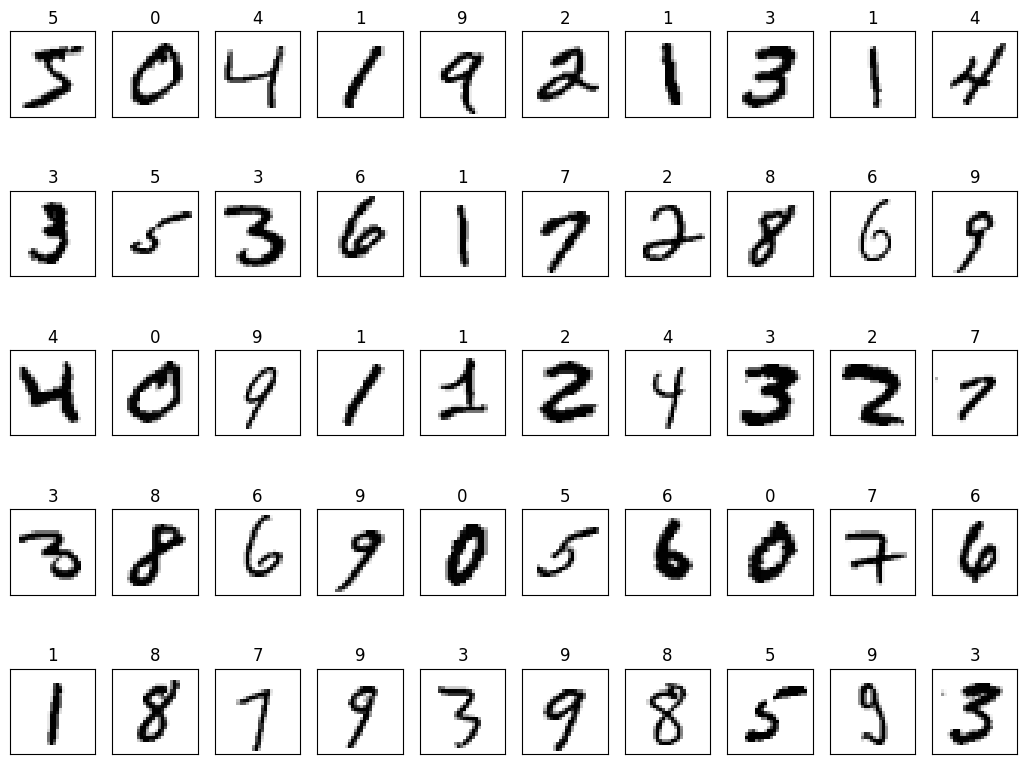

In [ ]:
#Prompt the user 'How many rows of randomly selected test images (in 10 images per row) would you like to review?'
#and output corresponding number of rows with ten images on each row.

n_cols = 10
n_rows= int(input(f'How many rows of training images (in {n_cols} images per row) would you like to review?'))
plot(in_train[:(n_cols*n_rows)],out_train[:(n_cols*n_rows)])

# Models in Keras

In [ ]:
model=keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500,activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax')]
    )
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# https://keras.io/api/optimizers/

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(in_train, out_train,batch_size=60,epochs=2,validation_split=0.2)

Epoch 1/2
800/800 [==============================] - 14s 15ms/step - loss: 0.4112 - accuracy: 0.8884 - val_loss: 0.2499 - val_accuracy: 0.9280
Epoch 2/2
800/800 [==============================] - 9s 11ms/step - loss: 0.2324 - accuracy: 0.9321 - val_loss: 0.1952 - val_accuracy: 0.9443


In [ ]:
#Use (in_train, out_train) for both training and validation to model neural network with only one hidden layer in Keras:


import random
import numpy as np
import tensorflow as tf

##reset all random seeds
seed=20742
epochs=2

import pandas as pd
df_models = pd.DataFrame(columns = ['optimizer','loss','unit_layer','activation','batch_size','validation_split'])

#No need but you may change:
## the optimizer,
for optimizer in ['adam','sgd']:
## the learning rate, and/or
## the loss function.
 for loss in ['sparse_categorical_crossentropy','mean_squared_error']:
#Improve the validation accuracies by changing:
## number of units
## changing activation functions
##changing the batch size
##changing the epochs, and/or
##changing the validation split.
  for units_layer in [100,500,100]:
    for activation in ['sigmoid','relu','tanh']:
      for batch_size in [30,60,100]:
        for validation_split in [0.2,0.3]
        ##reset all gerated states
        keras.backend.clear_session()
        ##reset all random seeds
        random.seed(seed)
        np.random.set_seed(seed)
        tf.random.set_seed(seed)
        model=keras.Sequential(layers=[
            keras.layers.Flatten(input_shape=[28,28]),
            keras.layers.Dense(units_layer,activation=activation),
            keras.layers.Dense(10,activation='softmax')]
                         )
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# https://keras.io/api/optimizers/
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])
model.fit(in_train, out_train,batch_size=batch_size,epochs=2,validation_split=validation_split)
history= df_models.loc[len(df_models)]=[optimizer,loss,unit_layer,activation,batch_size,validation_split,accuracy]

In [ ]:
#Change the number of units in the hidden layer
model1=keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(2500,activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax')]
    )

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(in_train, out_train,batch_size=60,epochs=2,validation_split=0.2)

Epoch 1/2
800/800 [==============================] - 40s 49ms/step - loss: 0.3911 - accuracy: 0.8838 - val_loss: 0.2640 - val_accuracy: 0.9222
Epoch 2/2
800/800 [==============================] - 40s 50ms/step - loss: 0.2413 - accuracy: 0.9285 - val_loss: 0.1927 - val_accuracy: 0.9446


In [ ]:
#Change the activation function of the hidden layer
model2=keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')]
    )

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(in_train, out_train,batch_size=60,epochs=2,validation_split=0.2)

Epoch 1/2
800/800 [==============================] - 10s 12ms/step - loss: 0.3174 - accuracy: 0.9062 - val_loss: 0.2131 - val_accuracy: 0.9381
Epoch 2/2
800/800 [==============================] - 9s 12ms/step - loss: 0.1660 - accuracy: 0.9507 - val_loss: 0.1474 - val_accuracy: 0.9575


In [ ]:
#Change the batch size
model3=keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')]
    )

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.fit(in_train, out_train,batch_size=100,epochs=2,validation_split=0.2)

Epoch 1/2
480/480 [==============================] - 7s 13ms/step - loss: 0.3370 - accuracy: 0.9010 - val_loss: 0.2269 - val_accuracy: 0.9357
Epoch 2/2
480/480 [==============================] - 7s 15ms/step - loss: 0.1909 - accuracy: 0.9451 - val_loss: 0.1620 - val_accuracy: 0.9535


In [ ]:
#Change the number of epochs:
model4=keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')]
    )

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model4.fit(in_train, out_train,batch_size=60,epochs=5,validation_split=0.2)

Epoch 1/5
800/800 [==============================] - 8s 10ms/step - loss: 0.3154 - accuracy: 0.9080 - val_loss: 0.2117 - val_accuracy: 0.9365
Epoch 2/5
800/800 [==============================] - 7s 9ms/step - loss: 0.1633 - accuracy: 0.9526 - val_loss: 0.1419 - val_accuracy: 0.9597
Epoch 3/5
800/800 [==============================] - 7s 9ms/step - loss: 0.1078 - accuracy: 0.9680 - val_loss: 0.1170 - val_accuracy: 0.9651
Epoch 4/5
800/800 [==============================] - 8s 10ms/step - loss: 0.0766 - accuracy: 0.9772 - val_loss: 0.0945 - val_accuracy: 0.9718
Epoch 5/5
800/800 [==============================] - 10s 12ms/step - loss: 0.0560 - accuracy: 0.9832 - val_loss: 0.0917 - val_accuracy: 0.9709


In [ ]:
#Change the validation split:
model5=keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')]
    )

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model5.fit(in_train, out_train,batch_size=60,epochs=5,validation_split=0.3)

Epoch 1/5
700/700 [==============================] - 8s 10ms/step - loss: 0.3320 - accuracy: 0.9015 - val_loss: 0.2195 - val_accuracy: 0.9388
Epoch 2/5
700/700 [==============================] - 8s 11ms/step - loss: 0.1761 - accuracy: 0.9480 - val_loss: 0.1612 - val_accuracy: 0.9543
Epoch 3/5
700/700 [==============================] - 8s 11ms/step - loss: 0.1178 - accuracy: 0.9651 - val_loss: 0.1471 - val_accuracy: 0.9567
Epoch 4/5
700/700 [==============================] - 7s 11ms/step - loss: 0.0832 - accuracy: 0.9752 - val_loss: 0.1148 - val_accuracy: 0.9657
Epoch 5/5
700/700 [==============================] - 8s 11ms/step - loss: 0.0610 - accuracy: 0.9816 - val_loss: 0.1061 - val_accuracy: 0.9678


#Model Selection

In [ ]:
max_acc = df_models
##reset all gerated states
keras.backend.clear_session()
##reset all random seeds
random.seed(seed)
np.random.set_seed(seed)
tf.random.set_seed(seed)
model=keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(units_layer,activation=activation),
    keras.layers.Dense(10,activation='softmax')]
                         )
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# https://keras.io/api/optimizers/
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])
model.fit(in_train, out_train,batch_size=batch_size,epochs=2,validation_split=validation_split)
history= df_models.loc[len(df_models)]=[optimizer,loss,unit_layer,activation,batch_size,validation_split,accuracy]

# Test Set

In [ ]:
model4.evaluate(in_test, out_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0860 - accuracy: 0.9754


[0.08601849526166916, 0.9753999710083008]

In [ ]:
probs= model4.predict(in_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
#find each ten probs, which is the highest
preds= probs.argmax(axis=1)
preds

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
n_cols = 10
n_rows= int(input(f'How many rows of training images (in {n_cols} images per row) would you like to review?'))
plot(in_test[:(n_cols*n_rows)],out_test[:(n_cols*n_rows)])

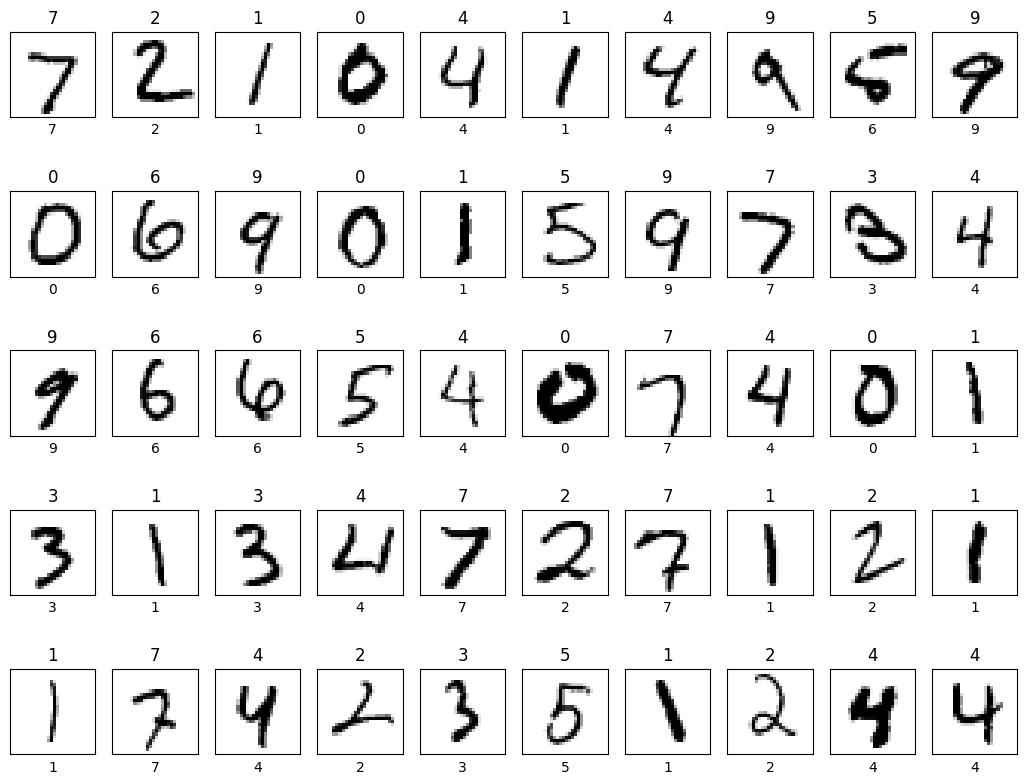

In [ ]:
#display first 50 images in test set

plot(in_test[:50], out_test[:50], preds[:50])

# Application

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact, Layout
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_test) - 1,
                                   description='Image Index',
                                   layout=Layout(width='100%'))
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    ax1.imshow(in_test[index], cmap=plt.cm.binary)
    ax1.set_title(f'Label: {class_names[out_test[index]]}')
    ax1.xaxis.tick_top()
    ax1.set_xlabel(f'Predict: {class_names[preds[index]]}')
    ax1.set_ylabel('Pixel Location Index')
    ax1.set_xticks(range(29))
    ax1.set_yticks(range(28))
    ax1.tick_params(axis='x', labelrotation=0)
    bar = sns.barplot(y=[class_names[ind] for ind in range(10)],
                      x=probs[index]*100)
    bar.set_xlim(0, 100)
    bar.set_xlabel('Probability (%)')
    bar.set_ylabel('Prediction Label')
    bar.set_title('Prediction Probabilities')
    plt.suptitle('Interactive Image Classification Prediction Visualizer', fontsize=15)
    plt.subplots_adjust(top=0.5)
    plt.subplots_adjust(wspace=0.7)
    fig.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=0, description='Image Index', layout=Layout(width='100%'), max=9999), Ou…

##Comments to Explain the code

* Among these five models, model 4 has the best performance. The validation loss decreased from 0.2117 to 0.0917, and the validation accuracy increased from 0.9365 to 0.9709 over 5 epochs, indicating that the model is also performing well on the validation data.

> Model1: Change the number of units from 500 to 2500 in the hidden layer
>> The accuracy decreased, the reason might be that the model has too many neurons but is not trained for enough epochs, it does not have enough time to learn from the data, leading to underfitting.

> Model2: Change the activation function to 'tanh' of the hidden layer
>> The accuracy increased, tanh can introduce more complexity into the model by mapping the input to a larger range (-1 to 1) compared to some other activation functions like sigmoid (0 to 1),helping the model capture more complex patterns in the data.

> Model3: Change the batch size from 60 to 100.
>>Larger batch sizes may lead to overfitting on the training data.

> Model4: Change the number of epochs
>> More epochs mean the model has more chances to update its weights and biases to minimize the loss function, and thus potentially improve its accuracy.


> Model5: Change the validation split
>> Giving model more unseen data to validate its learning, ensuring that the model is learning to generalize well, rather than just memorizing the training data.



* Browser Application: change the figsize to 16 inches wide and 8 inches tall, expand the range of xticks to maximum 28, and add the subplot title to clarify the purpose of browser application.